In [31]:
import openai
from openai import OpenAI
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import ast
from pathlib import Path
import json
import numpy as np

In [32]:
# def plot_coordinates(title, list_of_coordinates):# Define the grid size
#     grid_size = 25
    
#     # Create the grid with default color value (e.g., 0)
#     grid = np.zeros((grid_size, grid_size))
    
#     # Set the color value for the selected coordinates (e.g., 1)
#     for row, col in list_of_coordinates:
#         grid[row][col] = 1
    
#     fig, ax = plt.subplots()
#     cax = ax.matshow(grid, cmap='plasma', origin='lower')
    
#     # Move the x-axis to the bottom
#     ax.xaxis.set_ticks_position('bottom')
#     ax.xaxis.set_label_position('bottom')
    
#     # Set ticks and labels
#     ax.set_xticks(range(grid_size))
#     ax.set_yticks(range(grid_size))
#     ax.set_xticklabels(range(grid_size))
#     ax.set_yticklabels(range(grid_size))
    
#     # Add red dots on points not selected
#     for row in range(grid_size):
#         for col in range(grid_size):
#             if grid[row][col] == 0:
#                 ax.plot(col, row, 'ro') 
    
#     # Add X on the points that are selected
#     for row in range(grid_size):
#         for col in range(grid_size):
#             if grid[row][col] == 1:
#                 ax.text(col, row, 'X', va='center', ha='center', color='Black', weight='bold')
    
#     plt.title(title)
#     plt.grid(True)
#     plt.show()

In [33]:
def plot_coordinates(title, list_of_coordinates):
    grid_size = 5  # Define the grid size
    
    # Create the grid with default color value (e.g., 0)
    grid = np.zeros((grid_size, grid_size))
    
    # Set the color value for the selected coordinates (e.g., 1)
    for x, y in list_of_coordinates:
        grid[y][x] = 1  # Note: row and col are switched here
    
    fig, ax = plt.subplots()
    cax = ax.matshow(grid, cmap='plasma', origin='lower')
    
    # Move the x-axis to the bottom
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_position('bottom')
    
    # Set ticks and labels
    ax.set_xticks(range(grid_size))
    ax.set_yticks(range(grid_size))
    ax.set_xticklabels(range(grid_size))
    ax.set_yticklabels(range(grid_size))
    
    # Add red dots on points not selected
    for y in range(grid_size):
        for x in range(grid_size):
            if grid[y][x] == 0:
                ax.plot(x, y, 'ro')  # Plot red dots for unselected points
    
    # Add X on the points that are selected
    for y in range(grid_size):
        for x in range(grid_size):
            if grid[y][x] == 1:
                ax.text(x, y, 'X', va='center', ha='center', color='Black', weight='bold')
    
    plt.title(title)
    plt.grid(True)
    plt.show()

In [34]:
def plot_all_designs(data):
    grid_size = 5
    fig, ax = plt.subplots()
    
    # Loop through each design and plot
    for design in data['Designs']:
        title = design['Title']
        coordinates = design['Coordinates']
        plot_coordinates(title, coordinates, ax)
    
    # Set grid and axis labels
    ax.set_xticks(range(grid_size))
    ax.set_yticks(range(grid_size))
    ax.set_xticklabels(range(grid_size))
    ax.set_yticklabels(range(grid_size))
    
    plt.grid(True)
    plt.show()

In [35]:
# Specify the path to the .env file
env_path = Path(r'C:\Users\CrazyFlie\Documents\Nonuploadable_Git\.env')

# Load the .env file
load_dotenv(dotenv_path=env_path)

# Get the OpenAI API key from environment variables
api_key = os.getenv("OPENAI_API_KEY")

client = OpenAI(
    api_key=api_key
)

In [36]:
#Make sure the letter is not upside down or backwards otherwise it won't be legible. 

In [37]:
prompt = """
A drone us being used to place building blocks on a grid.
You are being asked to come up with the drop off locations for the drone that create a specified design. 
The origin of the grid is [0,0] in the bottom left corner and the last point is [5,5] in the top right.
The X axis goes from [0,0] to [5,0]. The Y axis goes from [0,0] to [0,5].
Make sure none of your points exceed the [5,5] index limit. If they do, fix the design.
Only Integers are allowed.

Please provide the Title and Coordinates in correct JSON format for the Design of the letter "H".
The Coordinates should be given in the specific order you would want them executed. 
Make sure your design makes sense and would be legible.

Make sure the design is legible by thinking step by step as you choose points.
Check the design before confirming it, such as for legibility and index limit of 5. 
If it is wrong, redo the design and then recheck until you find no errors using a step by step approach.
Only return the JSON in the strucuture provided as it needs to be parsed with Python. Do not include any other text or symbols.

Please use the following structure:

{
    "Design": [
        {
            "Title": "Title of Design",
            "Coordinates": [
                [x, y],
                [x, y]
            ],
            "Reasoning": "Your textual reseasoning here"
      }
    ]
}
"""

In [38]:
# Define the prompt
prompt = prompt

# Send the request to OpenAI using the new ChatCompletion method
response = client.chat.completions.create(
    model="gpt-4o",
    response_format = {"type": "json_object"},
    messages=[
        {
            "role": "user",
            "content": prompt,
        }
    ],   
)

In [39]:
print(response)

ChatCompletion(id='chatcmpl-9nu5nQmSko7sLpXnsYZ2XlEeVNCQs', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='{\n    "Design": [\n        {\n            "Title": "Letter H",\n            "Coordinates": [\n                [1, 1],\n                [1, 2],\n                [1, 3],\n                [1, 4],\n                [2, 3],\n                [3, 1],\n                [3, 2],\n                [3, 3],\n                [3, 4]\n            ],\n            "Reasoning": "To design the letter \'H\', start by creating the left vertical line at x=1 by placing blocks from y=1 through y=4. Then place the horizontal line in the middle at y=3, connecting the two vertical lines. Finally, create the right vertical line at x=3 from y=1 through y=4. Each coordinate represents an integer grid point and the entire design fits within the 5x5 grid."\n        }\n    ]\n}', role='assistant', function_call=None, tool_calls=None))], created=1721680719, model=

In [40]:
# Extract the response text
response_text = response.choices[0].message.content
print(response_text)

{
    "Design": [
        {
            "Title": "Letter H",
            "Coordinates": [
                [1, 1],
                [1, 2],
                [1, 3],
                [1, 4],
                [2, 3],
                [3, 1],
                [3, 2],
                [3, 3],
                [3, 4]
            ],
            "Reasoning": "To design the letter 'H', start by creating the left vertical line at x=1 by placing blocks from y=1 through y=4. Then place the horizontal line in the middle at y=3, connecting the two vertical lines. Finally, create the right vertical line at x=3 from y=1 through y=4. Each coordinate represents an integer grid point and the entire design fits within the 5x5 grid."
        }
    ]
}


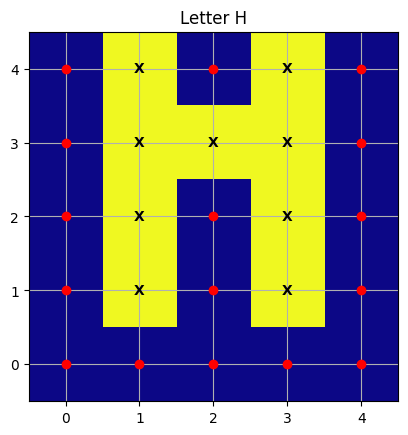

In [41]:
# Load JSON data
data = json.loads(response_text)

# Loop through each design and plot
for design in data['Design']:
    title = design['Title']
    coordinates = design['Coordinates']
    plot_coordinates(title, coordinates)